In [20]:
import numpy as np

def ricker( duration, dt, f ):
    freq = np.array( f )
    t = np.arange( -duration/2, duration/2 , dt)
    output = np.zeros( (t.size, freq.size ) )
    for i in range(freq.size):
        pi2 = (np.pi ** 2.0)
        if ( freq.size == 1 ):
            fsqr = freq ** 2.0
        else:
            fsqr = freq[i] ** 2.0
        tsqr = t ** 2.0
        pft = pi2 * fsqr * tsqr
        A = (1 - (2 * pft)) * np.exp(-pft)
        output[:,i] = A
    if freq.size == 1: output = output.flatten()
    return output

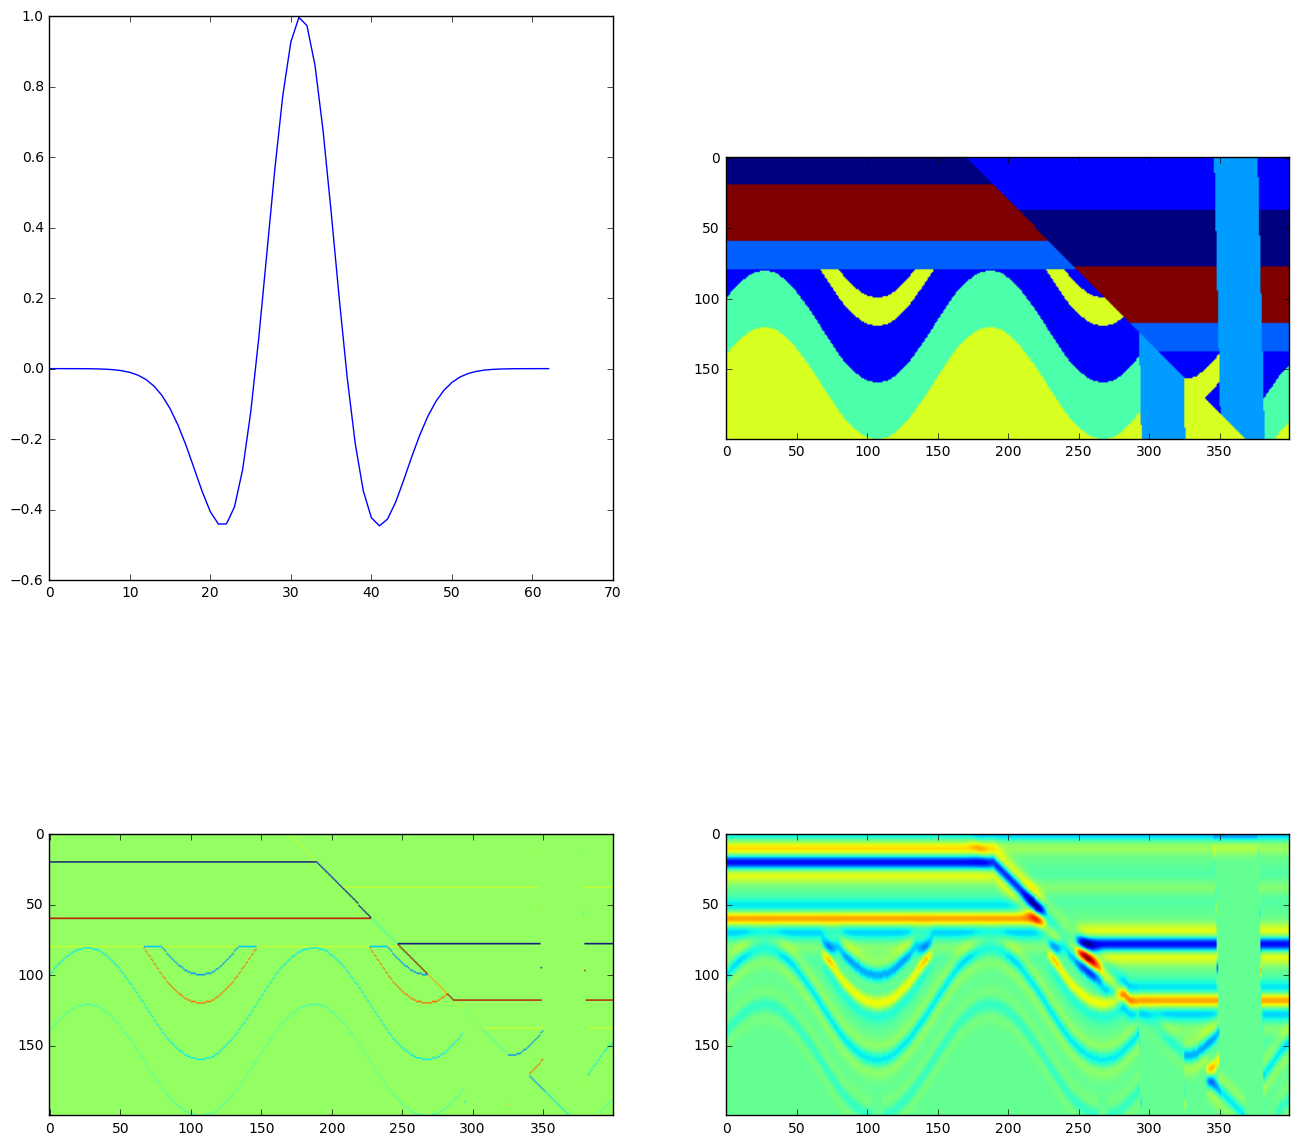

In [31]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt

slice = np.fromfile('data_fold_dyke_fault/su/out_0001_yz50.su', dtype=np.float64)
data = np.transpose(slice.reshape((400, 200)))


reflectivity = np.apply_along_axis(lambda x: np.convolve(x, [-0.5, 0.5], mode='same'), 0, data)
w = ricker(0.25, 0.004, 10)
seismic = np.apply_along_axis(lambda x: np.convolve(x, w, mode='same'), 0, reflectivity)

plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(w)
plt.subplot(2,2,2)
plt.imshow(data)
plt.subplot(2,2,3)
plt.imshow(reflectivity)
plt.subplot(2,2,4)
plt.imshow(seismic)